In [173]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz # Graphic Visualization
import graphviz
from sklearn import tree
from dtreeviz.trees import dtreeviz

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [174]:
# Load data
df = pd.read_csv('Carseats.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   400 non-null    int64  
 1   Sales        400 non-null    float64
 2   CompPrice    400 non-null    int64  
 3   Income       400 non-null    int64  
 4   Advertising  400 non-null    int64  
 5   Population   400 non-null    int64  
 6   Price        400 non-null    int64  
 7   ShelveLoc    400 non-null    object 
 8   Age          400 non-null    int64  
 9   Education    400 non-null    int64  
 10  Urban        400 non-null    object 
 11  US           400 non-null    object 
dtypes: float64(1), int64(8), object(3)
memory usage: 37.6+ KB


In [175]:
df.head()

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [176]:
# See if we have missing data
df.isnull().sum()

Unnamed: 0     0
Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [177]:
# Create a new boolean column called 'High' for those sales larger than 8
df['High'] = df['Sales'] > 8

In [178]:
df.head()

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,True
1,2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,True
2,3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,True
3,4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,False
4,5,4.15,141,64,3,340,128,Bad,38,13,Yes,No,False


In [179]:
# Dummy variables:

# Object columns:
object_col = df.dtypes == object
object_col[object_col == True].index

Index(['ShelveLoc', 'Urban', 'US'], dtype='object')

In [180]:
df[object_col[object_col == True].index].head()

,ShelveLoc,Urban,US
0,Bad,Yes,Yes
1,Good,Yes,Yes
2,Medium,Yes,Yes
3,Medium,Yes,Yes
4,Bad,Yes,No


In [181]:
df[object_col[object_col == True].index].describe()
# US and Urban each has 2 unique variables
# ShelveLoc has 3 unique variables: Bad, Medium and Good

,ShelveLoc,Urban,US
count,400,400,400
unique,3,2,2
top,Medium,Yes,Yes
freq,219,282,258


In [182]:
dummies = pd.get_dummies(df[object_col[object_col == True].index])
dummies.head()

,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,1,0,0,0,1,0,1
1,0,1,0,0,1,0,1
2,0,0,1,0,1,0,1
3,0,0,1,0,1,0,1
4,1,0,0,0,1,1,0


In [183]:
df_dummies = dummies.iloc[:, ::2] 
df_dummies.head()

,ShelveLoc_Bad,ShelveLoc_Medium,Urban_Yes,US_Yes
0,1,0,1,1
1,0,0,1,1
2,0,1,1,1
3,0,1,1,1
4,1,0,1,0


In [184]:
# Drop object dtype columns from df
df.drop(object_col[object_col == True].index, axis = 1, inplace = True)

In [185]:
# Concatenate df and df_dummies
df = pd.concat([df, df_dummies], axis = 1)

In [186]:
df.head()

,Unnamed: 0,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,High,ShelveLoc_Bad,ShelveLoc_Medium,Urban_Yes,US_Yes
0,1,9.50,138,73,11,276,120,42,17,True,1,0,1,1
1,2,11.22,111,48,16,260,83,65,10,True,0,0,1,1
2,3,10.06,113,35,10,269,80,59,12,True,0,1,1,1
3,4,7.40,117,100,4,466,97,55,14,False,0,1,1,1
4,5,4.15,141,64,3,340,128,38,13,False,1,0,1,0


In [187]:
# Let's check again if there is any object column in our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        400 non-null    int64  
 1   Sales             400 non-null    float64
 2   CompPrice         400 non-null    int64  
 3   Income            400 non-null    int64  
 4   Advertising       400 non-null    int64  
 5   Population        400 non-null    int64  
 6   Price             400 non-null    int64  
 7   Age               400 non-null    int64  
 8   Education         400 non-null    int64  
 9   High              400 non-null    bool   
 10  ShelveLoc_Bad     400 non-null    uint8  
 11  ShelveLoc_Medium  400 non-null    uint8  
 12  Urban_Yes         400 non-null    uint8  
 13  US_Yes            400 non-null    uint8  
dtypes: bool(1), float64(1), int64(8), uint8(4)
memory usage: 30.2 KB


In [188]:
# Features and target
col = df.columns[2:].tolist()
del col[-5]

In [189]:
col

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education',
 'ShelveLoc_Bad',
 'ShelveLoc_Medium',
 'Urban_Yes',
 'US_Yes']

In [190]:
x = df[col].values
y = df['High'].values

In [191]:
"""fit a classification tree in order to predict "High" using all variables but Sales"""

# Step 1: Make an instance of the Model
clf = DecisionTreeClassifier(random_state=0, min_samples_split=20)

# step 2: Train the model on the data
clf.fit(x, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [192]:
# Variable importance
df_imp_var = pd.DataFrame([])
df_imp_var['Features'] = col
df_imp_var['Importance Variable'] = clf.feature_importances_

In [193]:
df_imp_var.sort_values(by = 'Importance Variable', ascending = False, axis = 0, inplace = True)

In [194]:
df_imp_var

,Features,Importance Variable
4,Price,0.328792
2,Advertising,0.173548
0,CompPrice,0.140528
7,ShelveLoc_Bad,0.137692
8,ShelveLoc_Medium,0.071752
5,Age,0.062938
1,Income,0.046218
10,US_Yes,0.014161
6,Education,0.013945
3,Population,0.010426


<IPython.core.display.Javascript object>


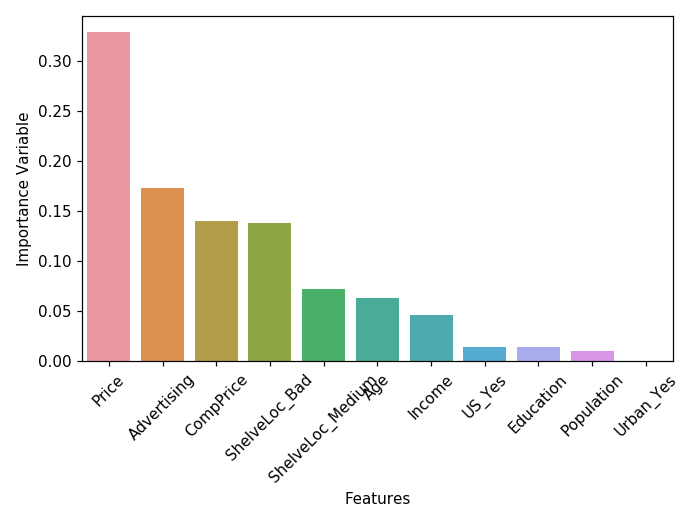

In [195]:
%matplotlib notebook
sns.barplot(df_imp_var['Features'], df_imp_var['Importance Variable'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Importance_variables.png', dpi = 100)

In [196]:
# training Error Rate
def Err_rate(matrix): 
    return (matrix.sum() - matrix.trace())/ (matrix.sum())

In [197]:
prediction = clf.predict(x)
cm = confusion_matrix(y, prediction)

Err_rate(cm)

0.1275

In [198]:
# Let's see how training error rate changes by min_samples_split
ER = []
min_s_s_range = range(2, 50, 2)
for i in min_s_s_range:
    clf = DecisionTreeClassifier(min_samples_split=i)
    clf.fit(x, y)
    
    prediction = clf.predict(x)
    cm = confusion_matrix(y, prediction)
    
    ER.append(Err_rate(cm))

<IPython.core.display.Javascript object>


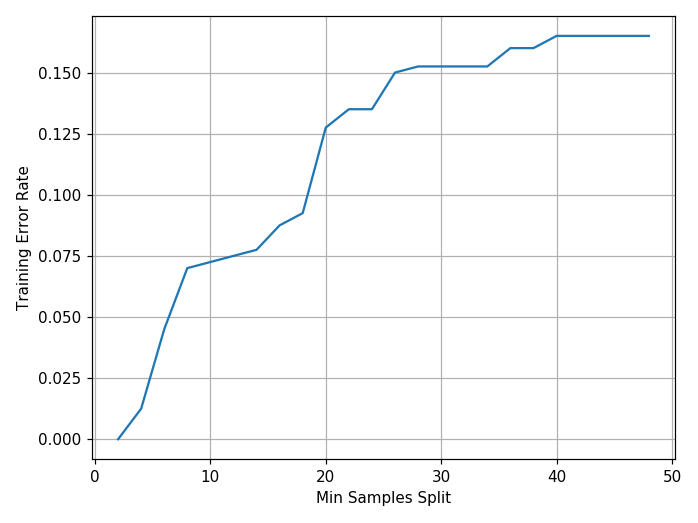

In [199]:
%matplotlib notebook
plt.plot(min_s_s_range, ER)
plt.grid(which = 'both')
plt.xlabel('Min Samples Split')
plt.ylabel('Training Error Rate')
plt.tight_layout()
plt.savefig('Training_Error_rate.png', dpi = 100)

### Graphic visualization

In [200]:
# Make an instance of the Model
clf = DecisionTreeClassifier(random_state=0, min_samples_split=20)

# Train the model on the data
clf.fit(x, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

<IPython.core.display.Javascript object>


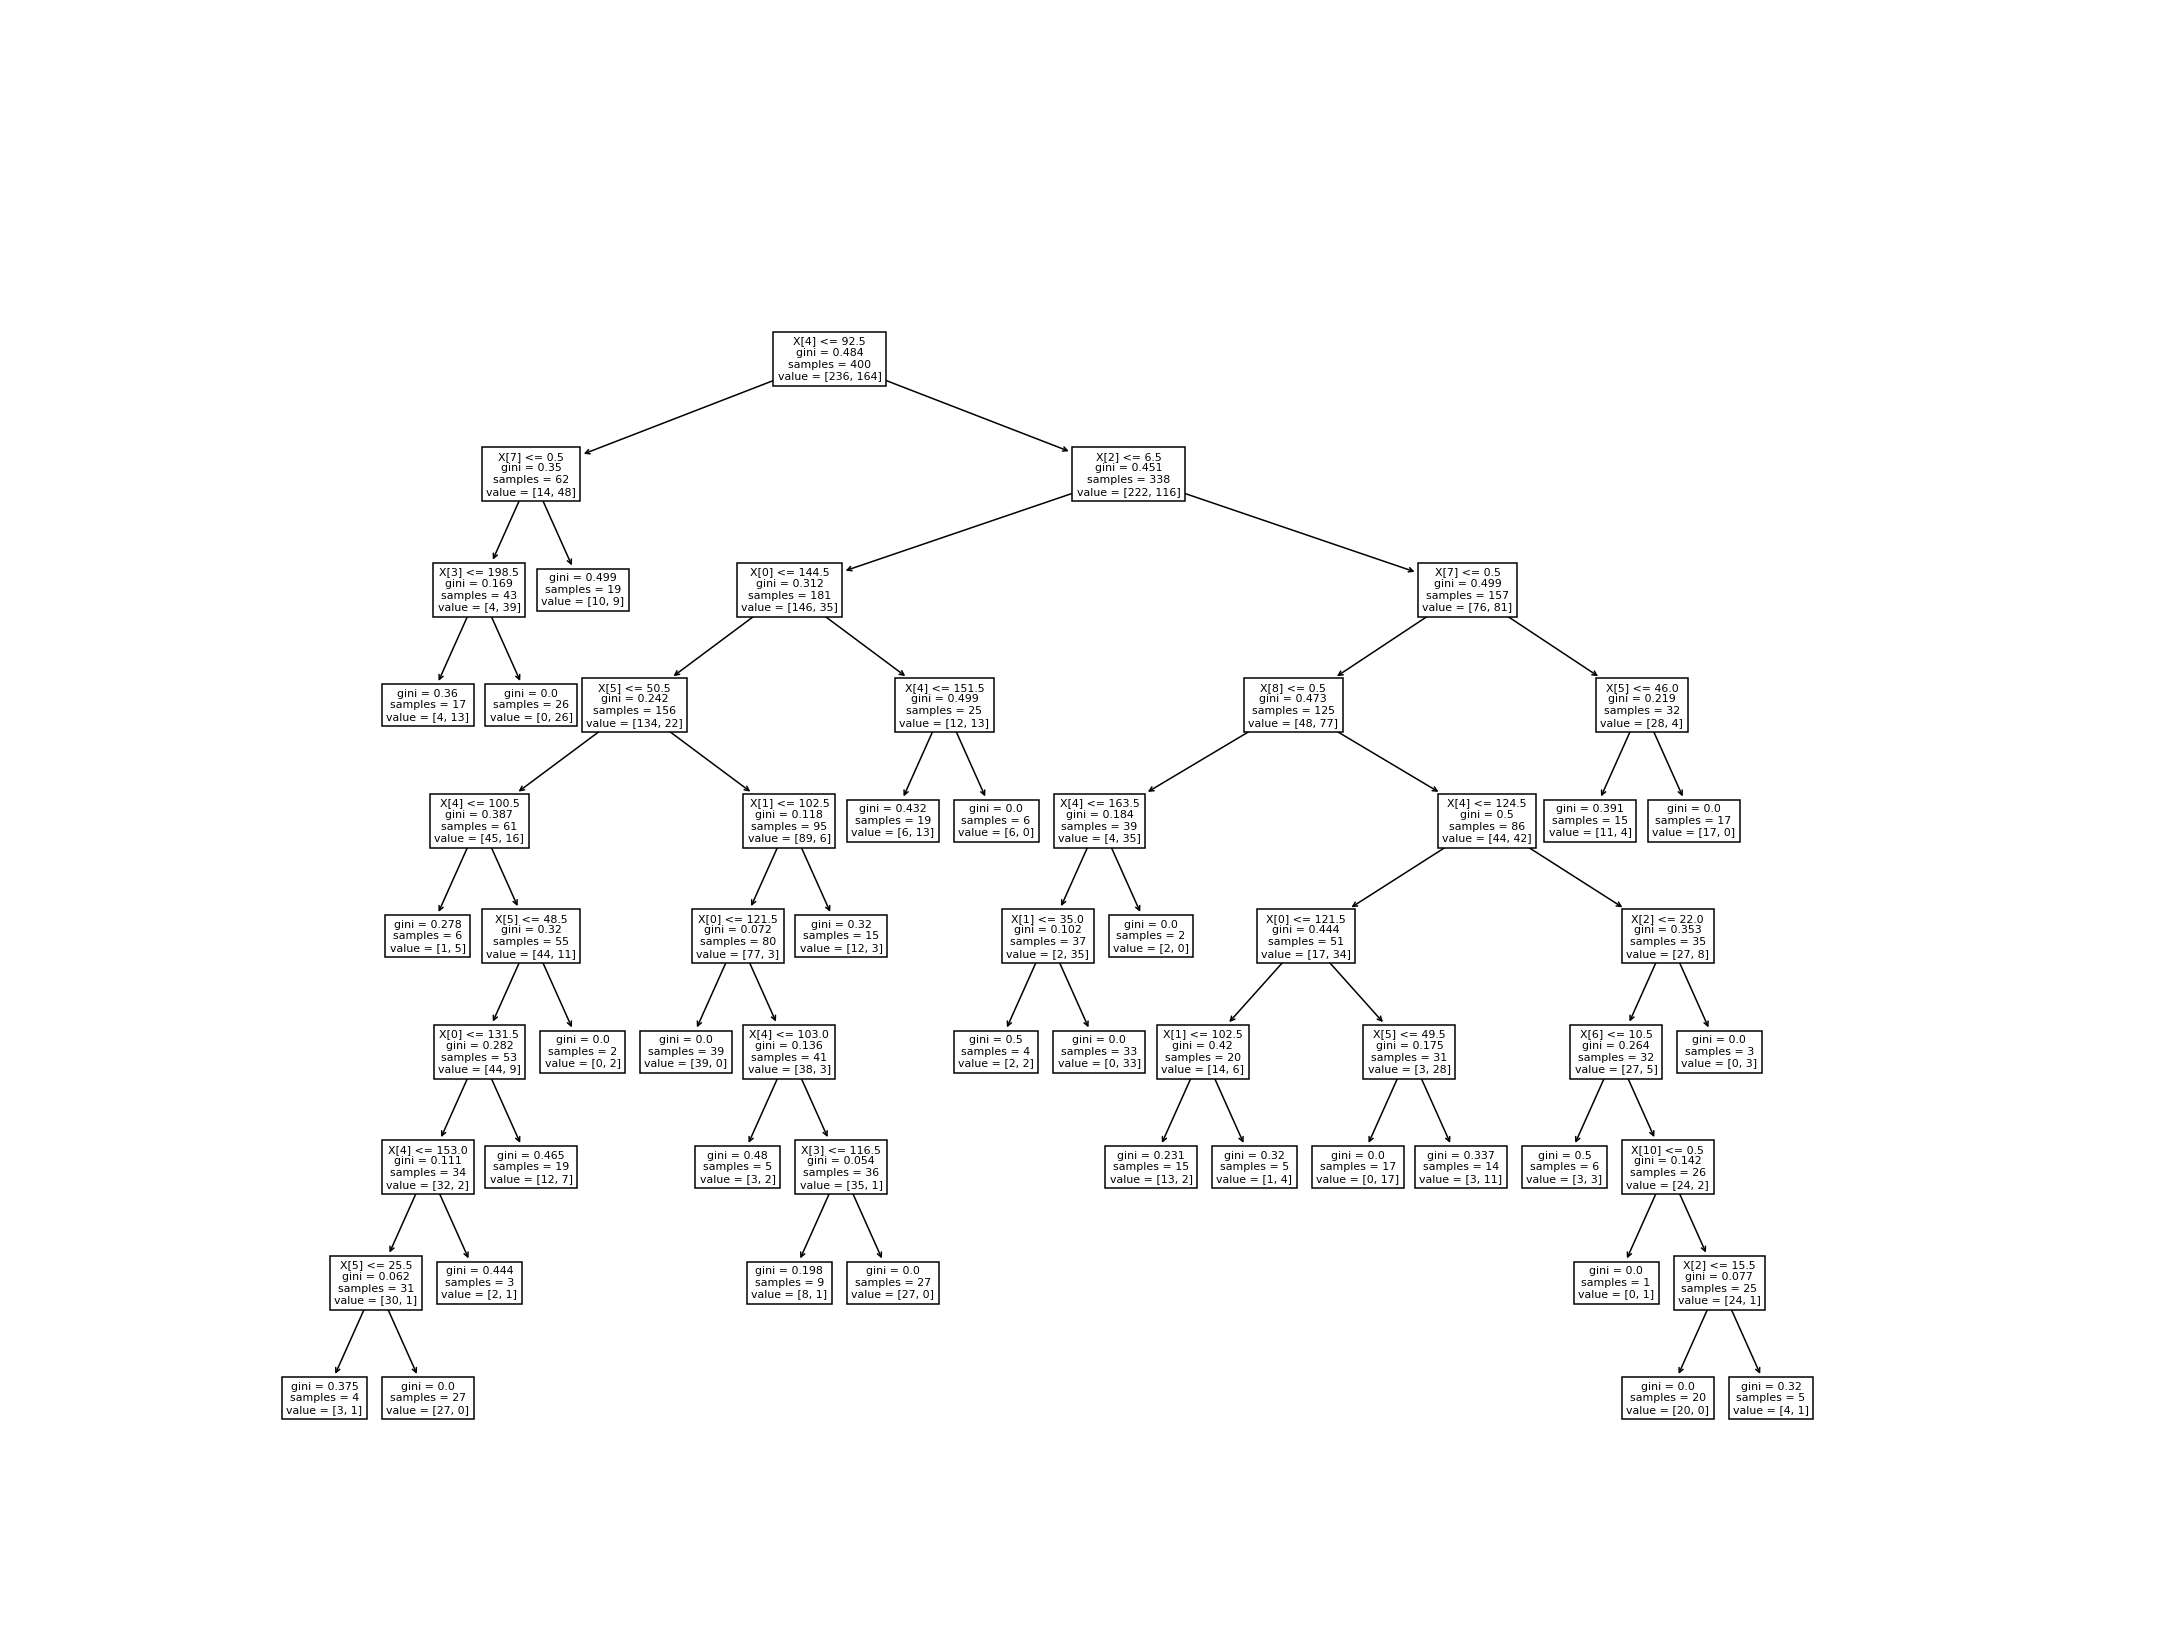

In [201]:
# Method 1: A Simple way
%matplotlib notebook
plt.figure(figsize = (20,15))
tree.plot_tree(clf);
# But this is not the most interpretable tree yet!

<IPython.core.display.Javascript object>


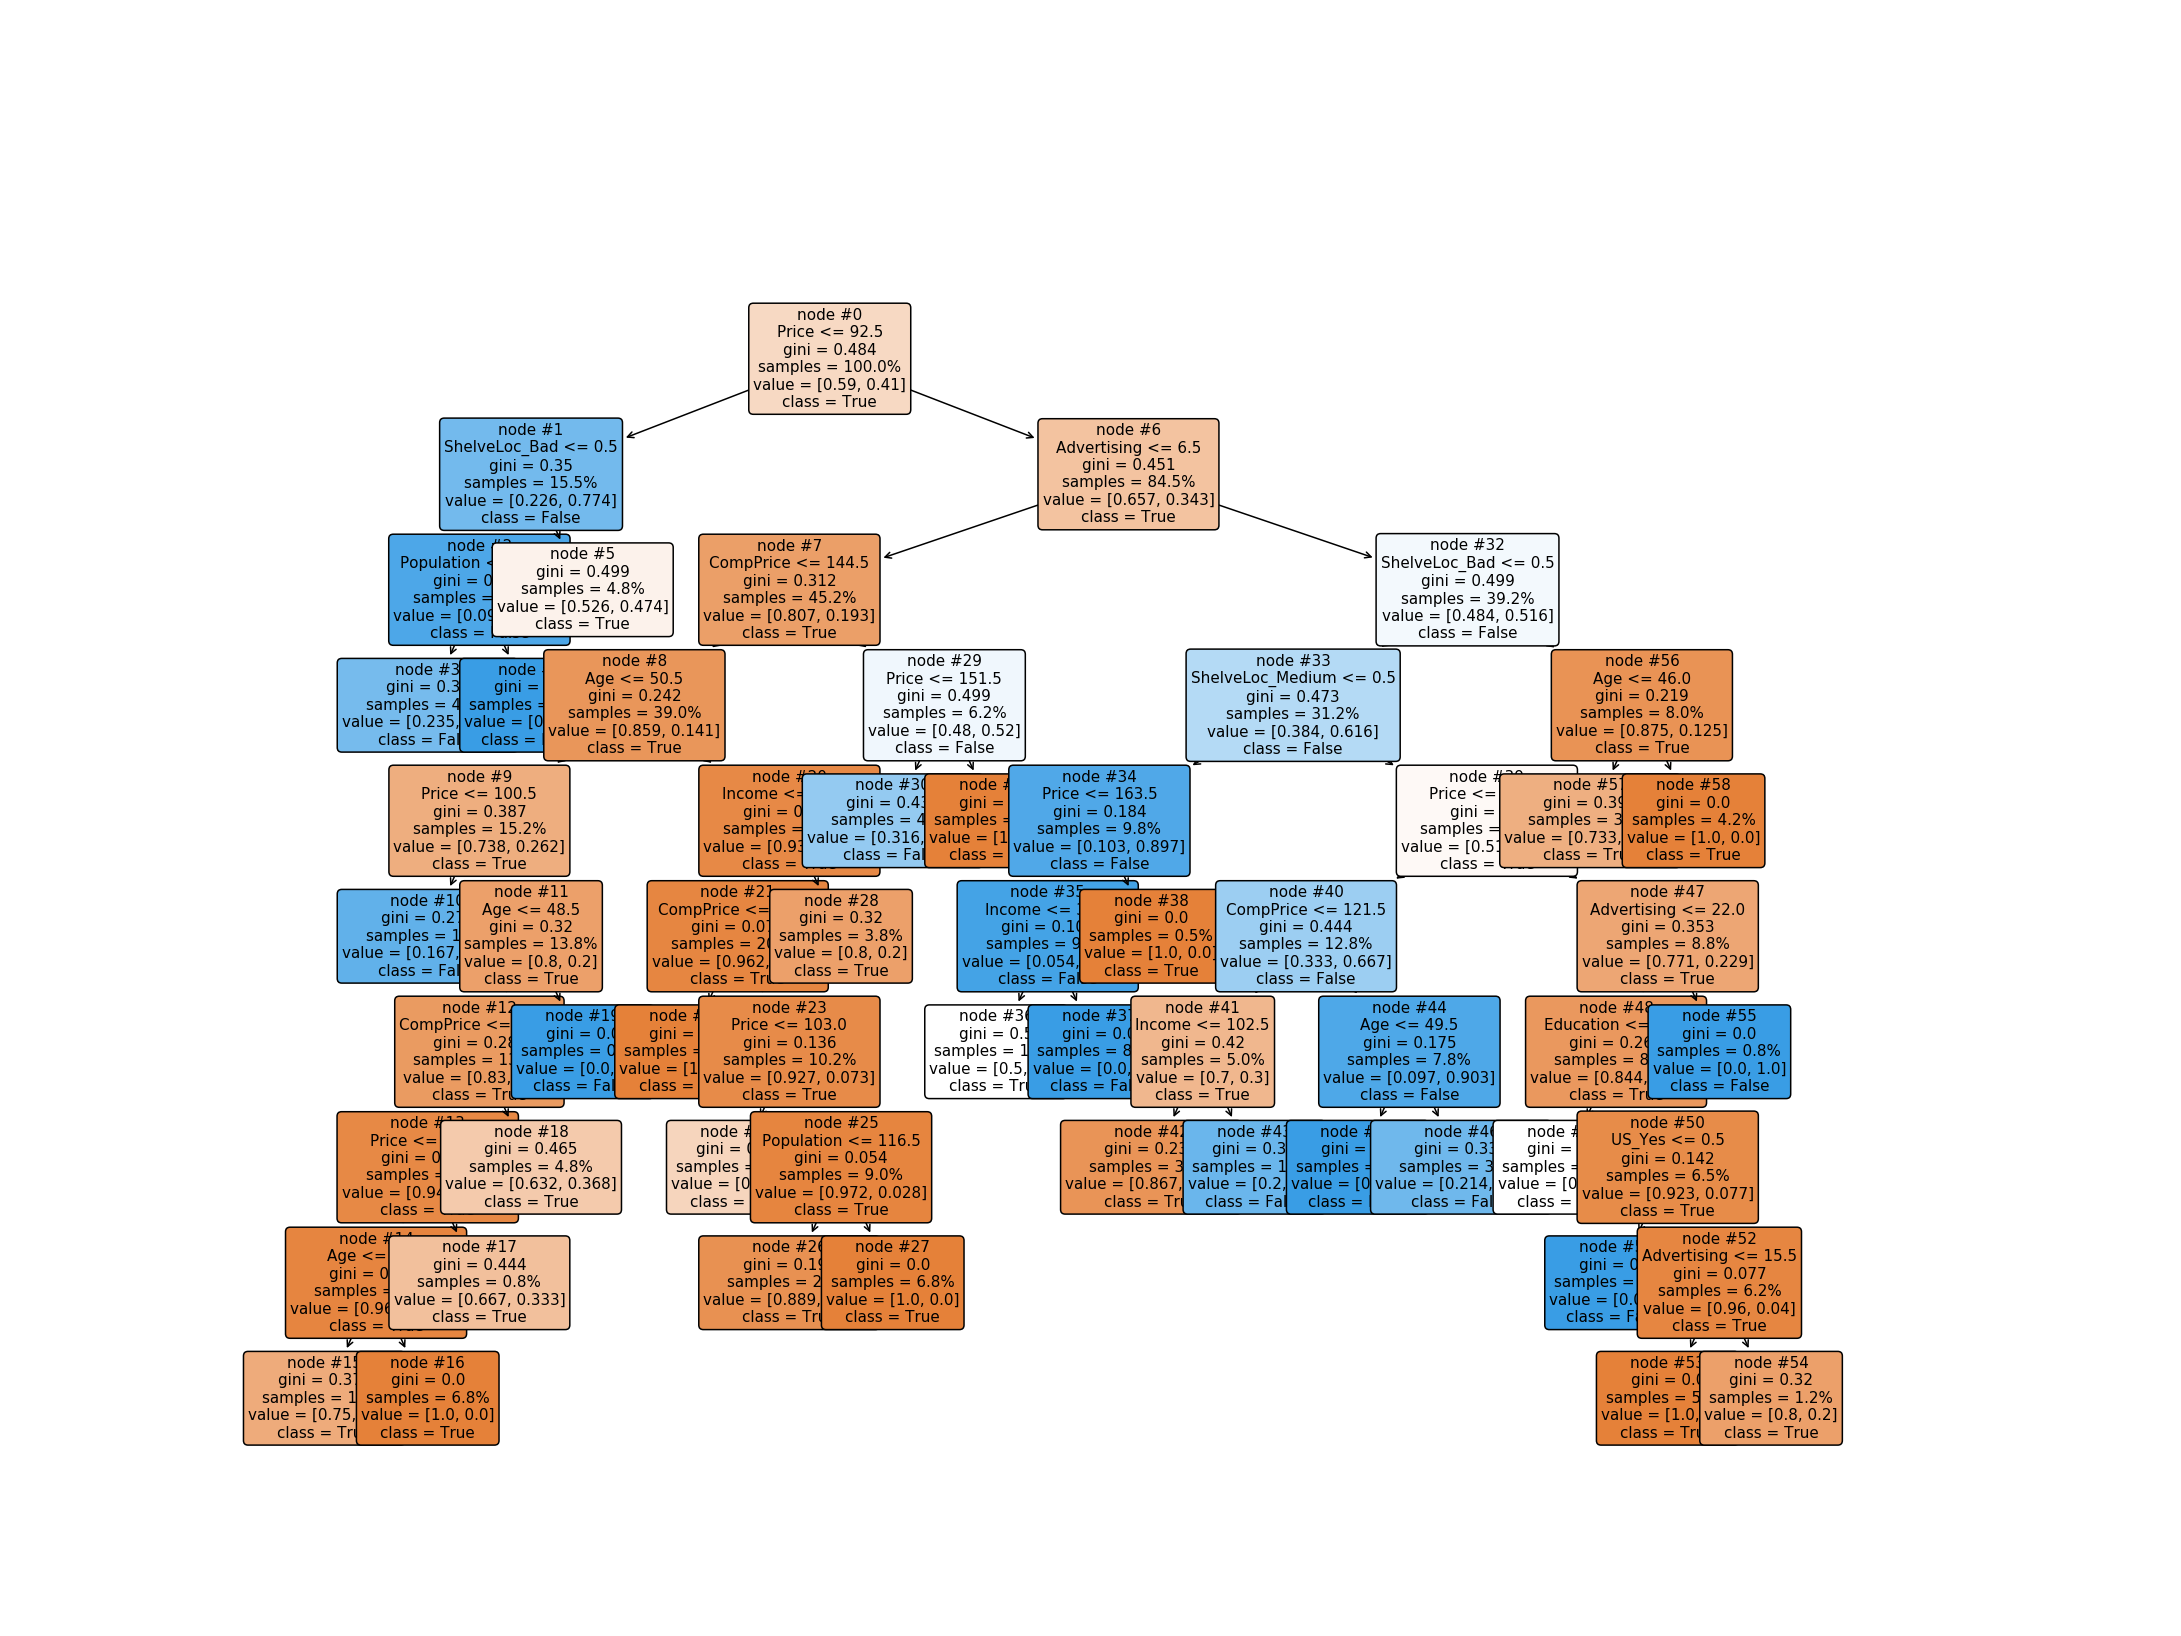

In [202]:
# Method 2: Same as method 1 with just more information and options
%matplotlib notebook
plt.figure(figsize = (20, 15))

feat_name = col
class_name = ['True', 'False']
tree.plot_tree(clf, feature_names = feat_name, class_names=class_name, filled = True, 
               fontsize = 10, rounded = True, rotate = True, node_ids=True, proportion = True);

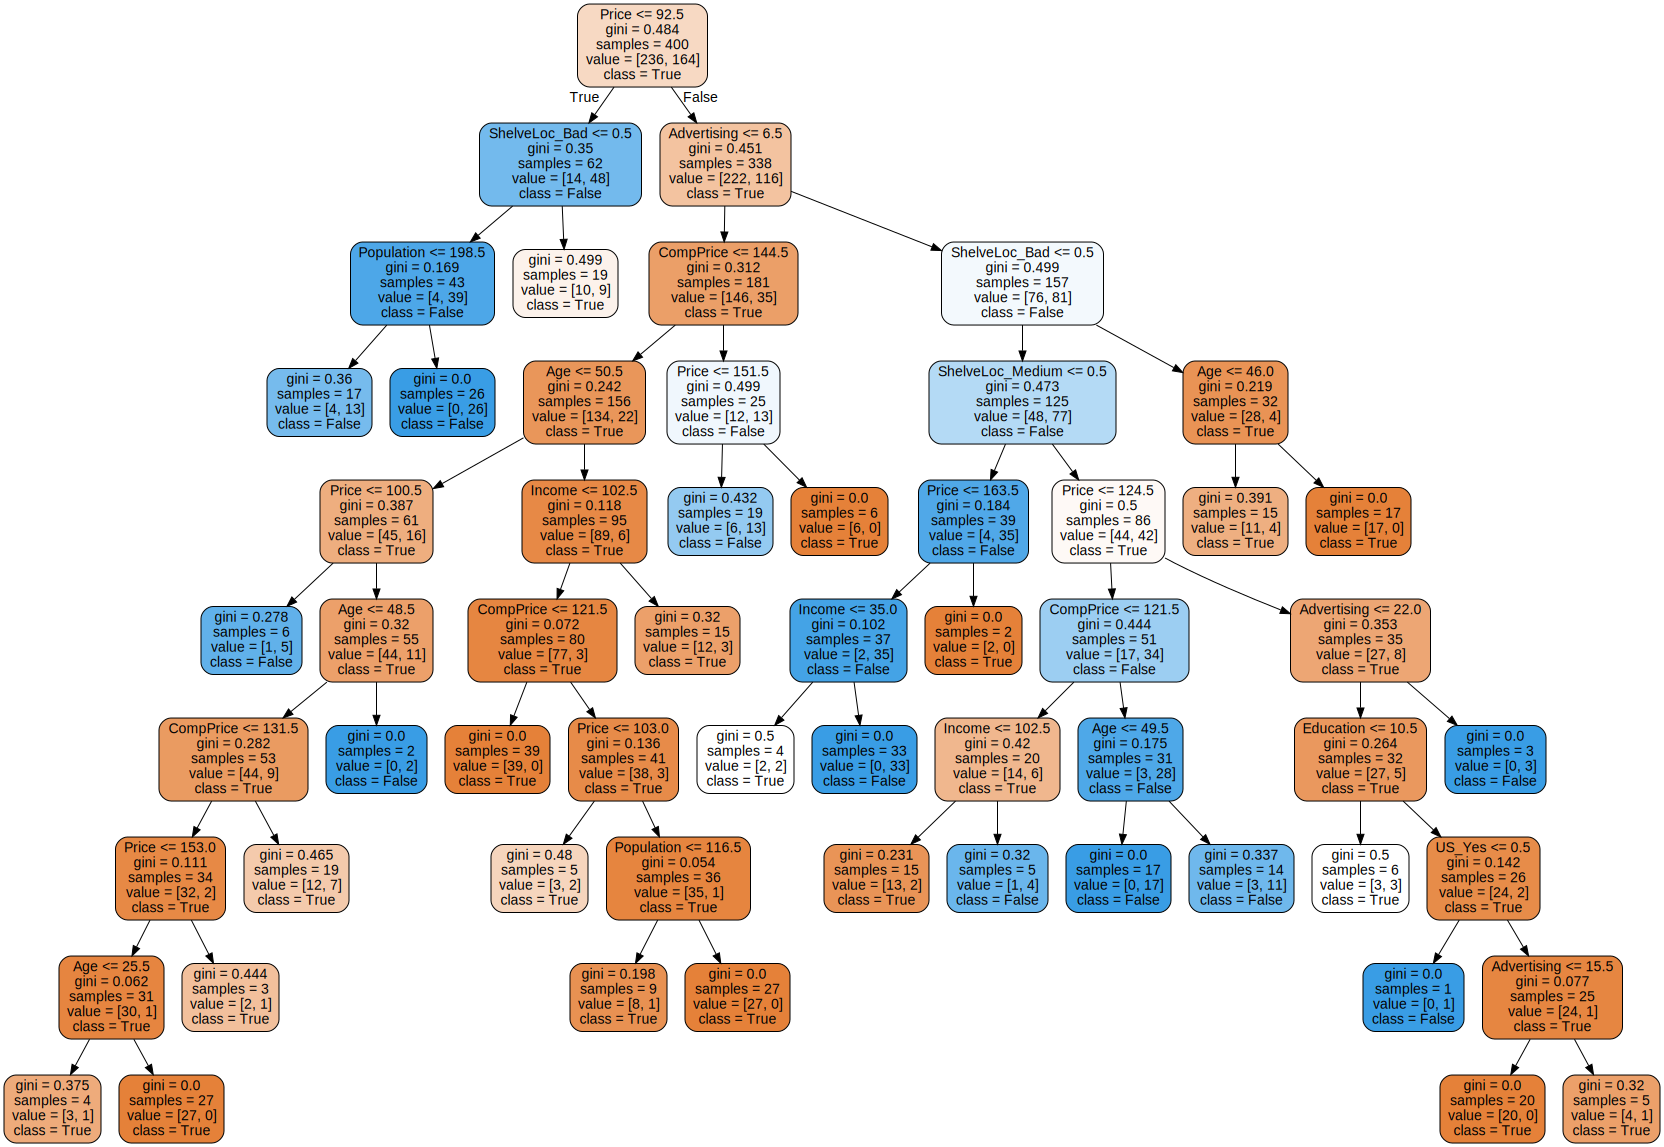

In [203]:
# Method 3: Using graphviz

# Dot data
dot_data =  tree.export_graphviz(clf,
                     out_file=None,
                     feature_names = feat_name, 
                     class_names=class_name,
                     filled = True, rounded = True)
# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph.render("decision_tree_graphivz")
graph

In [90]:
# Method 4: Using dtreeviz

#viz = dtreeviz(clf, x, y,
#               target_name="High",
#                feature_names=col,
#                class_names=class_name)

#viz

In [91]:
#viz.save("decision_tree.svg")

### Test Error Rate

In [204]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.2)

In [205]:
# Make an instance of the Model
clf = DecisionTreeClassifier(random_state=0, min_samples_split=20)

# Train the model on the data
clf.fit(x_train, y_train)

# Make a prediction for test data
prediction = clf.predict(x_test)

# Confusion Matrix
cm = confusion_matrix(y_test, prediction)

# Error rate:
Err_rate(cm)

0.2875

In [206]:
# Let's see how training and test error rates change by min_samples_split
ER_train, ER_test = [], []
min_s_s_range = range(2, 50, 2)
for i in min_s_s_range:
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.2)
    
    clf = DecisionTreeClassifier(min_samples_split=i)
    
    clf.fit(x_train, y_train)
    
    prediction_train = clf.predict(x_train)
    prediction_test = clf.predict(x_test)
    
    cm_train = confusion_matrix(y_train, prediction_train)
    cm_test = confusion_matrix(y_test, prediction_test)
    
    ER_train.append(Err_rate(cm_train))
    ER_test.append(Err_rate(cm_test))

<IPython.core.display.Javascript object>


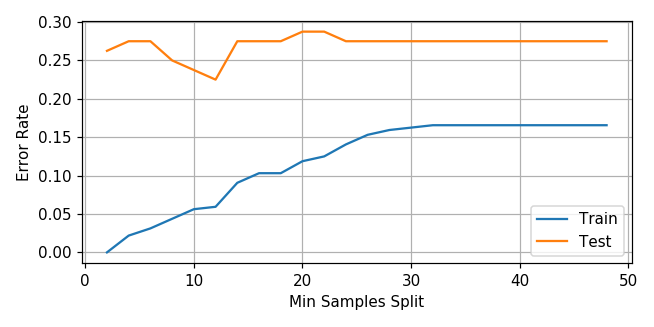

In [207]:
%matplotlib notebook
plt.figure(figsize = (6, 3))
plt.plot(min_s_s_range, ER_train, label = 'Train')
plt.plot(min_s_s_range, ER_test, label = 'Test')
plt.grid(which = 'both')
plt.xlabel('Min Samples Split')
plt.ylabel('Error Rate')
plt.legend()
plt.tight_layout()
plt.savefig('Training_Test_Error_rates.png', dpi = 100)

In [208]:
print('Minimum error rate in test dataset: {}'.format( min(ER_test))) 
print('Associate error rate in training dataset: {}'.format(ER_train[np.argmin(ER_test)]))

Minimum error rate in test dataset: 0.225
Associate error rate in training dataset: 0.059375


### Prunning

In [121]:
"""Next, we consider whether pruning the tree might lead to improved
results."""


x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.2)

clf = DecisionTreeClassifier(random_state = 42)
path = clf.cost_complexity_pruning_path(x_train, y_train)

In [122]:
ccp_alphas = path.ccp_alphas
ccp_alphas

array([0.        , 0.00284091, 0.00286458, 0.002875  , 0.00301724,
       0.00375   , 0.00416667, 0.00450247, 0.0047619 , 0.00489815,
       0.00520833, 0.00546875, 0.00563218, 0.00568182, 0.00570685,
       0.00576923, 0.0059375 , 0.00801633, 0.00874126, 0.00931034,
       0.00972222, 0.00994561, 0.01132695, 0.01154576, 0.01195973,
       0.01196172, 0.017018  , 0.01880208, 0.02178334, 0.02256734,
       0.03516516, 0.04298439, 0.06096852])

In [123]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state = 42, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)  

In [210]:
# Accuracy scores. Note that 1 - Error rate is Accuracy
# You can check it
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

# Error rates
ER_train, ER_test = [], [] 
for clf in clfs:
    prediction_train = clf.predict(x_train)
    prediction_test = clf.predict(x_test)
    
    cm_train = confusion_matrix(y_train, prediction_train)
    cm_test = confusion_matrix(y_test, prediction_test)
    
    ER_train.append(Err_rate(cm_train))
    ER_test.append(Err_rate(cm_test))

<IPython.core.display.Javascript object>


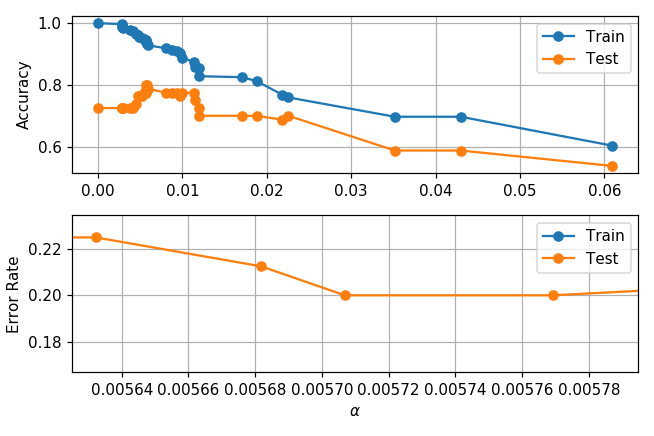

In [211]:
%matplotlib notebook
fig, ax = plt.subplots(2, figsize = (6,4))
ax[0].plot(ccp_alphas, train_scores, label = 'Train', marker = 'o')
ax[0].plot(ccp_alphas, test_scores, label = 'Test', marker = 'o')
ax[0].grid(which = 'both')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

ax[1].plot(ccp_alphas, ER_train, label = 'Train', marker = 'o')
ax[1].plot(ccp_alphas, ER_test, label = 'Test', marker = 'o')
ax[1].grid(which = 'both')
ax[1].set_ylabel('Error Rate')
ax[1].set_xlabel(r'$\alpha$')
ax[1].legend()

plt.tight_layout()
plt.savefig('Training_Test_Accuracy_Error_rate.png', dpi = 100)

In [169]:
print('Minimum error rate in test dataset: {}'.format( min(ER_test))) 
print('Associate error rate in training dataset: {}'.format(ER_train[np.argmin(ER_test)]))

Minimum error rate in test dataset: 0.2
Associate error rate in training dataset: 0.0625


In [223]:
# Cross val scores with ccp_alpha = 0.00570685
clf = DecisionTreeClassifier(random_state = 42, ccp_alpha=0.0057)
scores = cross_val_score(clf, x_train, y_train, cv = 5) 
print('Cross validation score: {:.2f} +/- {:.2f}'.format(scores.mean(), scores.std()))

Cross validation score: 0.76 +/- 0.06


In [224]:
clf

DecisionTreeClassifier(ccp_alpha=0.0057, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')